**Abyanandi Zaintama**

**H8 DSFT Batch 1**

*Milestone 2*

# Context

**An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.**

# Content

The dataset used for model building contained 10999 observations of 12 variables.
The data contains the following information:

- ID: ID Number of Customers.
- Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
- Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
- Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
- Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
- Cost of the product: Cost of the Product in US Dollars.
- Prior purchases: The Number of Prior Purchase.
- Product importance: The company has categorized the product in the various parameter such as low, medium, high.
- Gender: Male and Female.
- Discount offered: Discount offered on that specific product.
- Weight in gms: It is the weight in grams.
- Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from numpy import mean, median

import time
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder,OneHotEncoder
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score,cross_val_predict, learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve, auc,roc_auc_score
from sklearn.decomposition import PCA

import time
import joblib

from sklearn.mixture import GaussianMixture
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced 

from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.compose import make_column_transformer,ColumnTransformer 

# Data Loading

In [3]:
df = pd.read_csv('/Users/zaintama/Documents/Hacktiv8/Dataset/Ecommerce.csv')
df.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [6]:
df.shape

(10999, 12)

# EDA

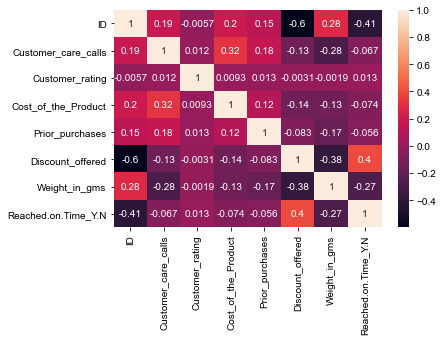

In [7]:
sns.heatmap(df.corr(),annot=True)
sns.set(rc={'figure.figsize':(15,15)})

> #### Columns correlation
>
> Columns that highly correlated (0.3 - 0.4):
>    - **Discount offered and Reached on time**
>    - **Customer care calls and cost of the product**
>
>  *The highly correlated give us insight that, the more value of discount, it might be affected the shipment time. Also the higher the cost of the product, the more frequently customer got called for enquiry of the shipment* 
>
> Columns that low correlated (0.01-0.20):
>   - **Customer calls and prior purchases**
>   - **Customer calls and customer rating**
>   - **Cost of the product and prior purchases**
>  *The frequency of customer being called, it affected the prior purchases and customer rating, but not that significant. The higher the product cost, it affect that quantity of prior purchased by customer*

In [8]:
num_cols = df.select_dtypes(include = ['int64', 'float64'])


cat_cols  = df.select_dtypes(include = ['object'])

In [9]:
cat_cols = df.select_dtypes([object, bool]).columns.tolist()
len(cat_cols)

4

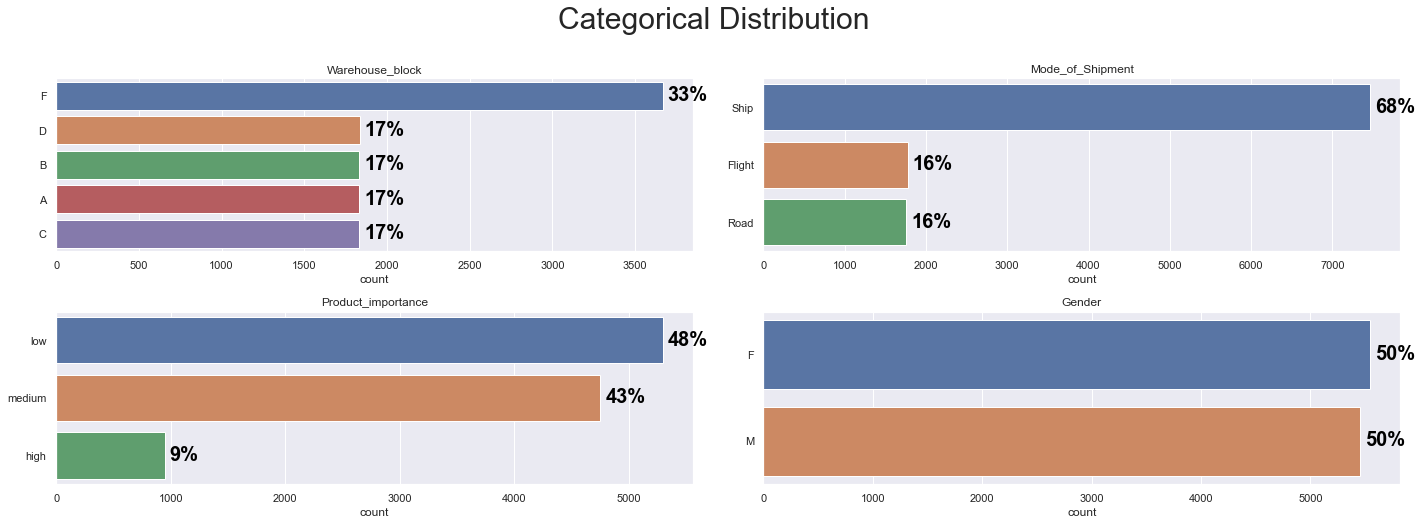

In [10]:
plt.figure(figsize=(20, 10))
plt.suptitle('Categorical Distribution', fontsize=30, y = 1.005)
for i in range(len(cat_cols)):
    plt.subplot(len(cat_cols)//2+1, 2, i+1)
    ax = sns.countplot(
        y = df[cat_cols[i]], order = df[cat_cols[i]].value_counts().index
    )
    ax.set_ylabel('')
    ax.set_title(cat_cols[i])

    for p in ax.patches:
        ax.annotate(
            format(p.get_width()*100/len(df), '.0f') + "%",
            (p.get_width(), p.get_y() + p.get_height() / 2.), 
            ha = 'left',
            fontweight = "bold",
            xytext = (5,-5), 
            textcoords = 'offset points',
            color = 'black', fontsize=20
        )
plt.tight_layout()
plt.show()

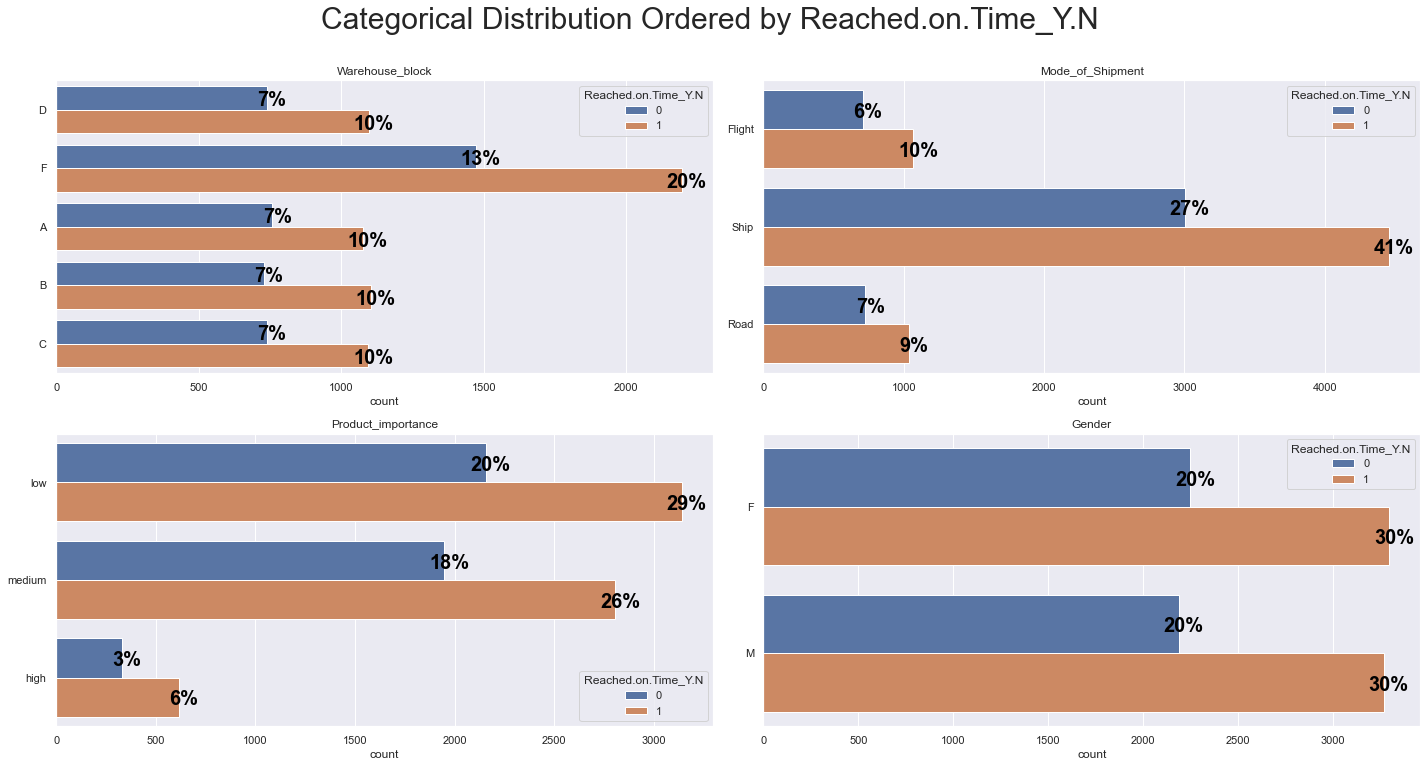

In [11]:
plt.figure(figsize=(20,15))
plt.suptitle('Categorical Distribution Ordered by Reached.on.Time_Y.N ', fontsize=30, y = 1.005)
for i in range(len(cat_cols)):
    plt.subplot(len(cat_cols)//2+1, 2, i+1)
    ax = sns.countplot(
        y = df[cat_cols[i]],
        hue = df['Reached.on.Time_Y.N']
    )
    ax.set_ylabel('')
    ax.set_title(cat_cols[i])

    for p in ax.patches:
        ax.annotate(
            format(p.get_width()*100/len(df), '.0f') + "%",
            (p.get_width(), p.get_y() + p.get_height() / 2.), 
            ha = 'center',
            fontweight = "bold",
            xytext = (5,-8), 
            textcoords = 'offset points',
            color = 'black', fontsize=20
        )
plt.tight_layout()
plt.show()

## Numerical features with target

In [12]:
num_cols = df.select_dtypes("number").columns.tolist()
len(num_cols)

8

In [13]:
#num_cols.remove('Reached.on.Time_Y.N')
#len(num_cols)

In [14]:
len(num_cols)

8

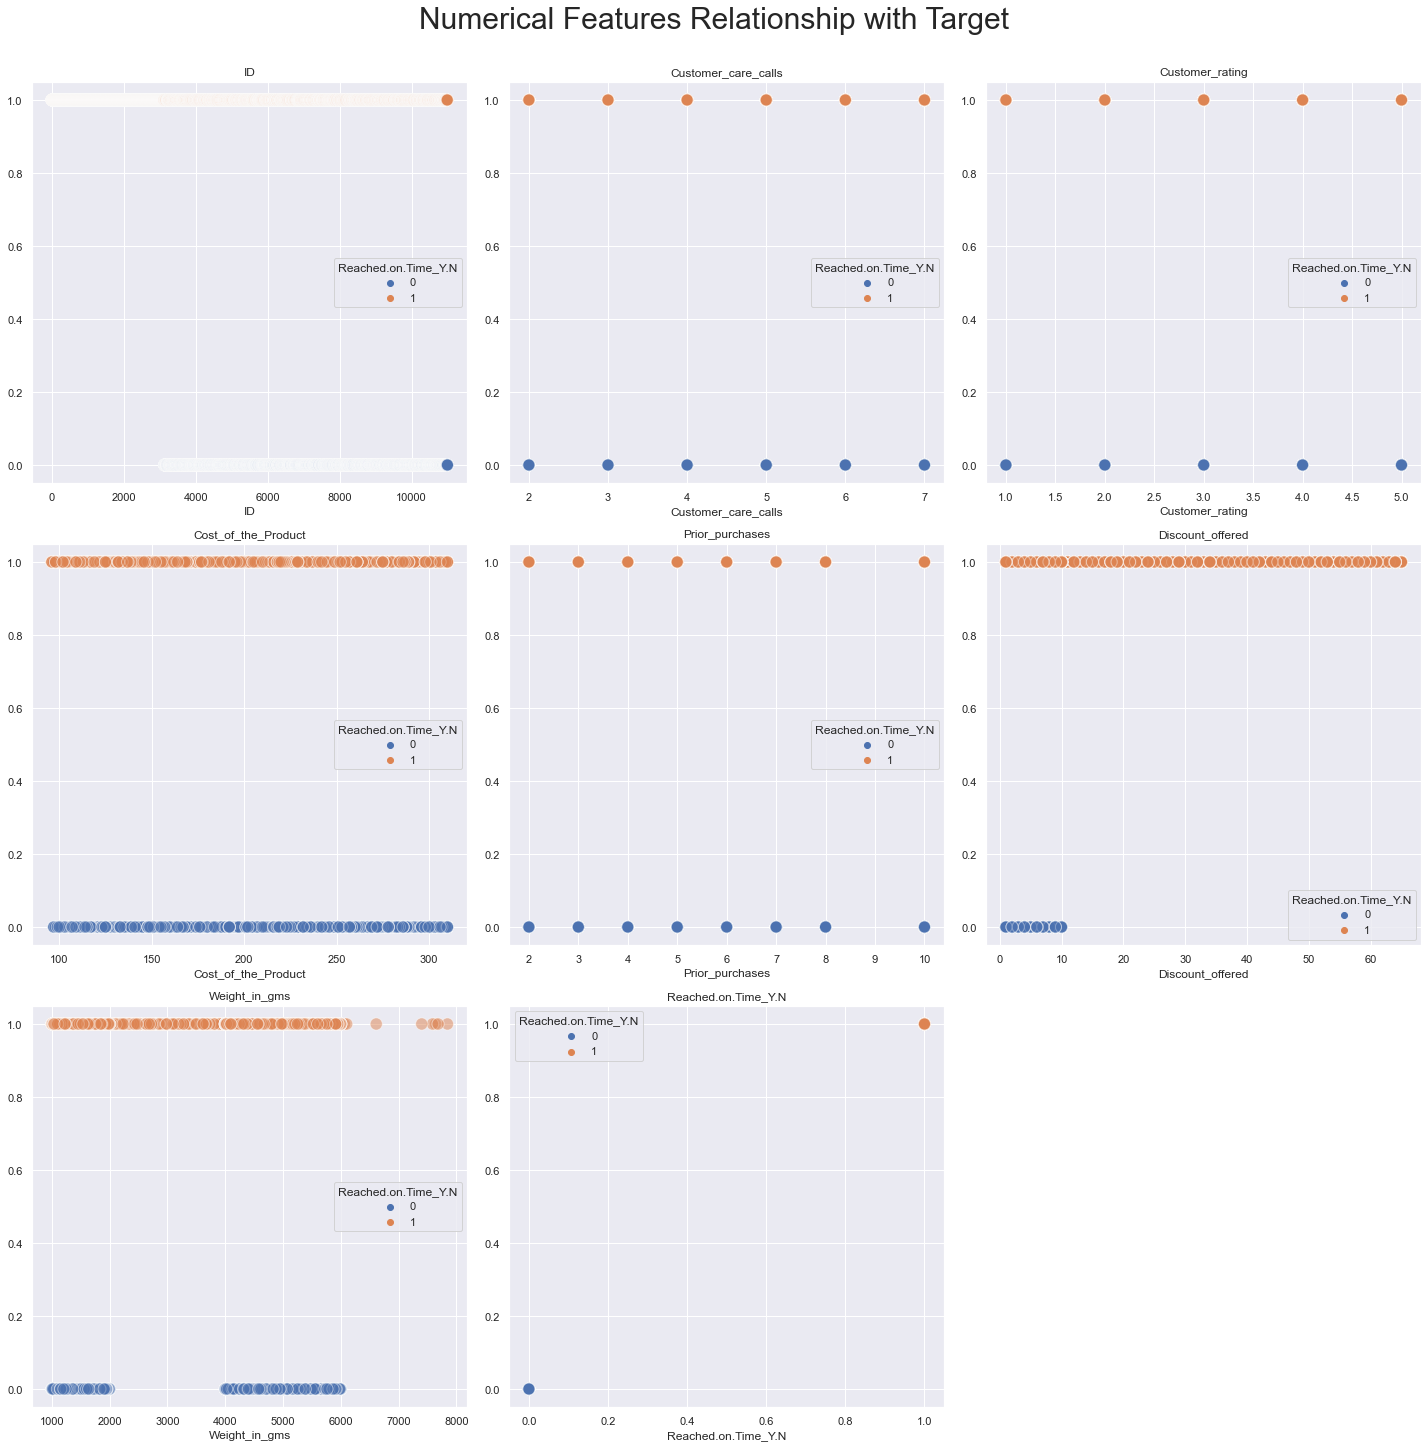

In [15]:
plt.figure(figsize=(20, 20))
plt.suptitle('Numerical Features Relationship with Target', fontsize = 30, y = 1.005)
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//3+1, 3, i+1)
    ax = sns.scatterplot(
        x = df[num_cols[i]],
        y = df['Reached.on.Time_Y.N'], hue = df['Reached.on.Time_Y.N'],
         s = 150, alpha = 0.5
    )
a    ax.set_title(num_cols[i])
plt.tight_layout()
plt.show()

> #### Numerical features relationship with target
>
> From the several graphs above, the significant difference is on Discount_offered and Weight_in_grams.
> 
> - **For the ontime shipment, the discount is never above 10. In the other hand, the delayed shipment cases has a discount_offered values more than ontime shipment**
> - **The weight of product for on time values are in range from 1000-2000 grams and 4000-6000 grams. Quite unique, because from 2000-4000 grams, the shipment are always delayed**

## Detailed analysis 

**Value counts of target**

In [16]:
target = ['Reached.on.Time_Y.N']
df['Reached.on.Time_Y.N'].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

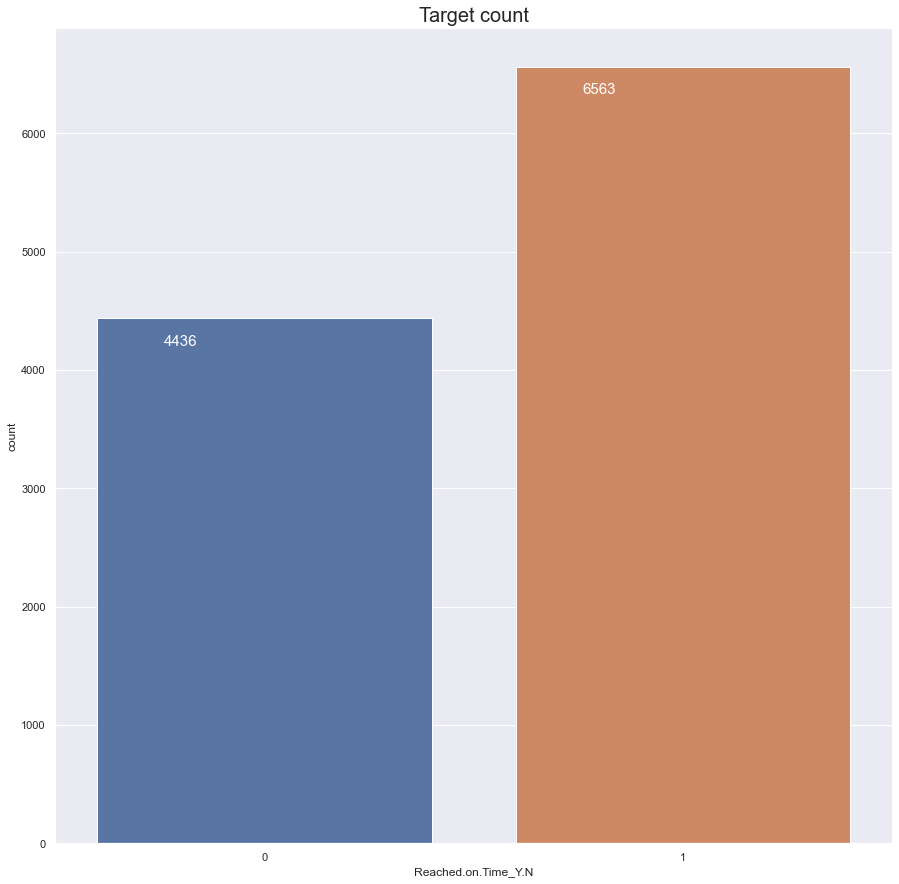

In [17]:
ax = sns.countplot(data=df, x=df['Reached.on.Time_Y.N'])
ax.set_title('Target count', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=15)
plt.show()

Text(0.5, 1.0, 'Pie chart of target')

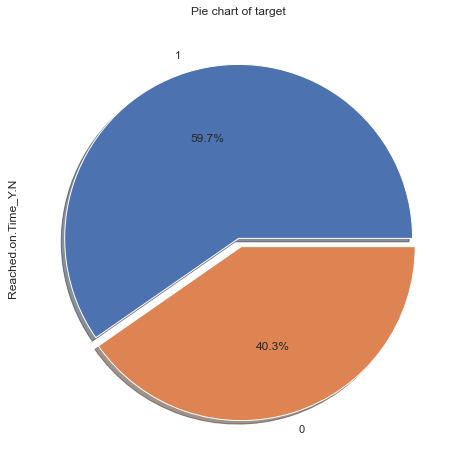

In [18]:
plt.figure(figsize=(8,8))
df['Reached.on.Time_Y.N'].value_counts().plot.pie(explode=[0,0.05], autopct='%1.1f%%', shadow=True)
plt.title('Pie chart of target')

> #### Target values count
>
> From the pie chart and countplot, we can conclude that there is more case of delayed shipment than on-time shipment.
> - **59.7% case are delayed (6563 cases)**
> - **40.3% case are on-time(4436 cases)**

**Target by customer rating**

Text(0.5, 1.0, 'Pie chart of customer rating')

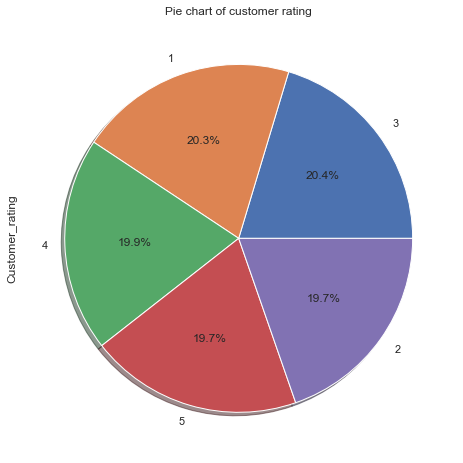

In [19]:
plt.figure(figsize=(8,8))
df['Customer_rating'].value_counts().plot.pie( autopct='%1.1f%%', shadow=True)
plt.title('Pie chart of customer rating')

> #### Customer rating count
>
> *From the pie chart, the customer rating is almost evenly distributed. But most of the customer rating are rating 3 (middle) followed by rating 1 (lowest)*

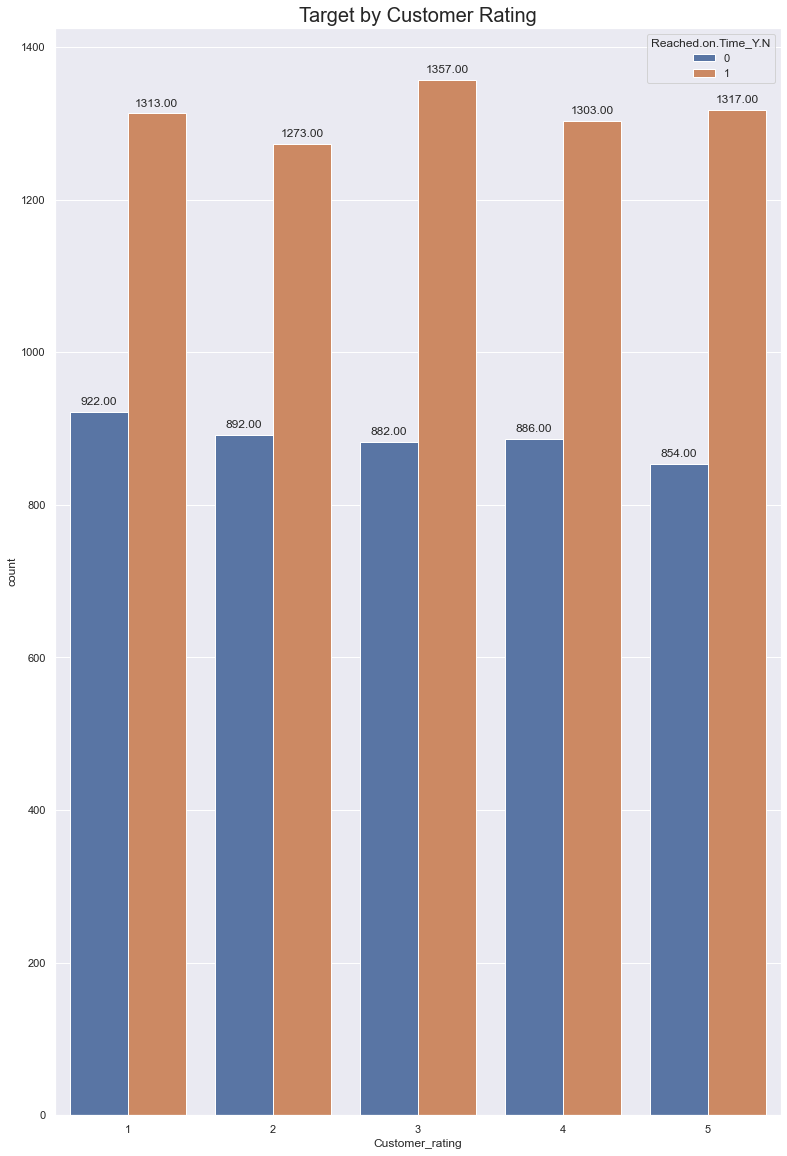

In [20]:
sns.set(rc={'figure.figsize':(13,20)})
ax = sns.countplot(data=df, x=df['Customer_rating'],hue=df['Reached.on.Time_Y.N'])
ax.set_title('Target by Customer Rating', fontsize=20)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

> #### Customer rating by target count
>
> *The delayed shipment dominated count by rating. But it is interesting, because the best rating doesn't have significantly different either the shipment delayed or not*
>
> **But, cases that has the most delayed shipment is the case that customer rating 3**

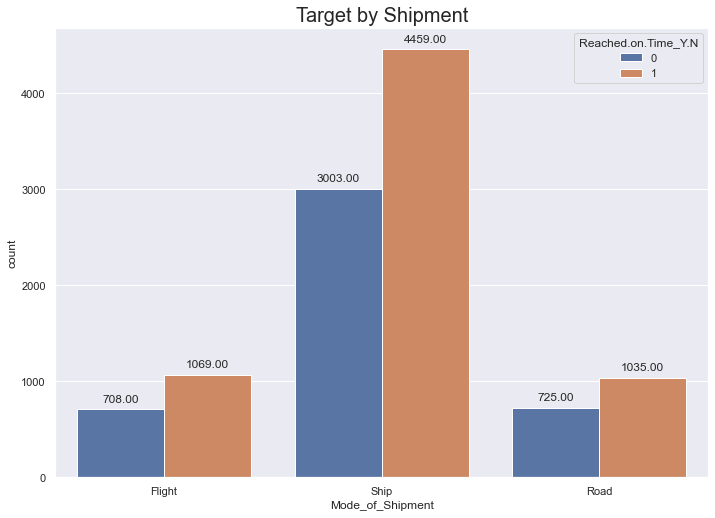

In [21]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(data=df, x=df['Mode_of_Shipment'],hue=df['Reached.on.Time_Y.N'])
ax.set_title('Target by Shipment', fontsize=20)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

> #### Shipment by target count
>
> From the countplot, we can conclude that there is more case of delayed on Ship, followed by flight, and then Road. It is interesting that the case count between Flight and Road are not significantly different. The majority of shipment is using ship, 67.84% case or 7462 cases of shipment is using ship, but the majority of shipment that using ship, 4459 cases or 59.75 cases are delayed
> 
> - **40.54% case are delayed by shipment using Ship (4459 cases)**
> - **40.3% case are on-time(4436 cases)**

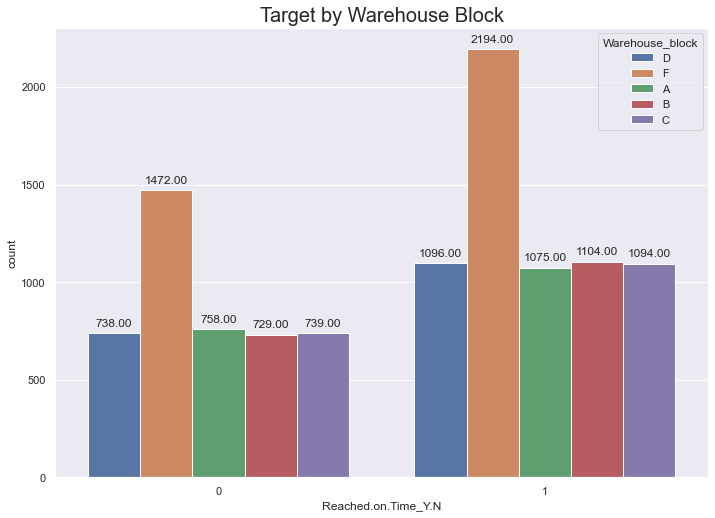

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(data=df, x=df['Reached.on.Time_Y.N'],hue=df['Warehouse_block'])
ax.set_title('Target by Warehouse Block', fontsize=20)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

> #### Target count by warehouse block
>
> Warehouse block A,B,C,D the delayed shipment cases are not significantly differet, but for warehouse F, the number are way up high.
>   - Warehouse A: 1096 cases
>   - Warehouse B: 1104 cases
>   - Warehouse C: 1094 cases
>   - Warehouse D: 1075 cases
>   - Warehouse F: 2194 cases
>
> **Speaking of values of shipment, warehouse F has the highest number of product that has been shipped from**

Text(0.5, 1.0, 'Pie chart of product importance')

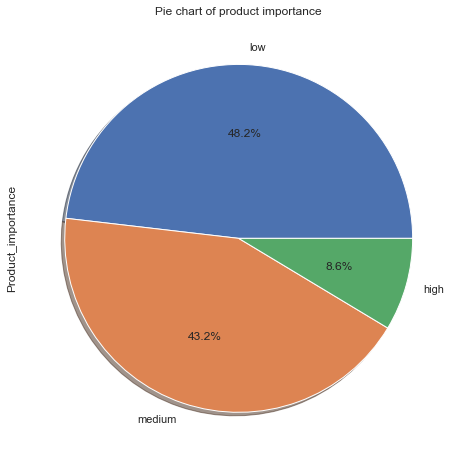

In [23]:
plt.figure(figsize=(8,8))
df['Product_importance'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.title('Pie chart of product importance')

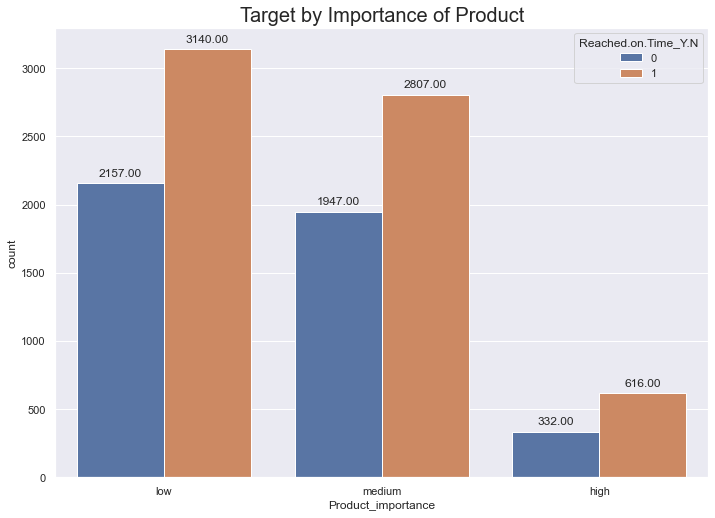

In [24]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(data=df, x=df['Product_importance'],hue=df['Reached.on.Time_Y.N'])
ax.set_title('Target by Importance of Product', fontsize=20)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

In [25]:
fig = px.sunburst(df, path=['Warehouse_block','Mode_of_Shipment','Product_importance'], values='Reached.on.Time_Y.N')
fig.show()

> #### Target count by importance of product
>
> The majority of product that had been shipped are low and medium importance product, cover 92% of shipments count, the 8% others are high importance product. Because the highly shipped product are low and medium importance product, the majority of delayed shipment cases are low and medium importance product
>

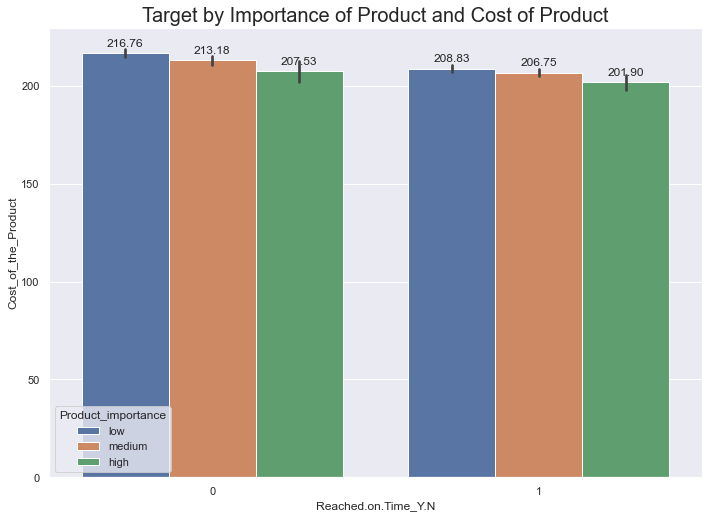

In [26]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(data=df, x=df['Reached.on.Time_Y.N'],y=df['Cost_of_the_Product'],hue=df['Product_importance'],estimator=mean)
ax.set_title('Target by Importance of Product and Cost of Product', fontsize=20)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

<AxesSubplot:xlabel='Cost_of_the_Product', ylabel='Count'>

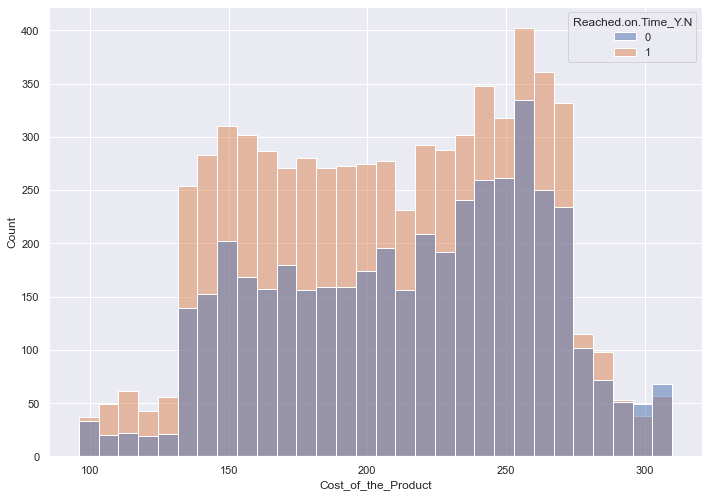

In [27]:
sns.histplot(df,x=df['Cost_of_the_Product'],hue=df['Reached.on.Time_Y.N'])

In [28]:
fig = px.histogram(df, x=df['Cost_of_the_Product'], color=df['Reached.on.Time_Y.N'], marginal="rug")
fig.show()

In [29]:
fig = px.histogram(df, x=df['Weight_in_gms'], color=df['Reached.on.Time_Y.N'], marginal="rug")
fig.show()

> #### Distribution of target by product weight
>
> Product weight from 2000-4000 is always has the delayed shipment
>

In [30]:
num_cols

['ID',
 'Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms',
 'Reached.on.Time_Y.N']

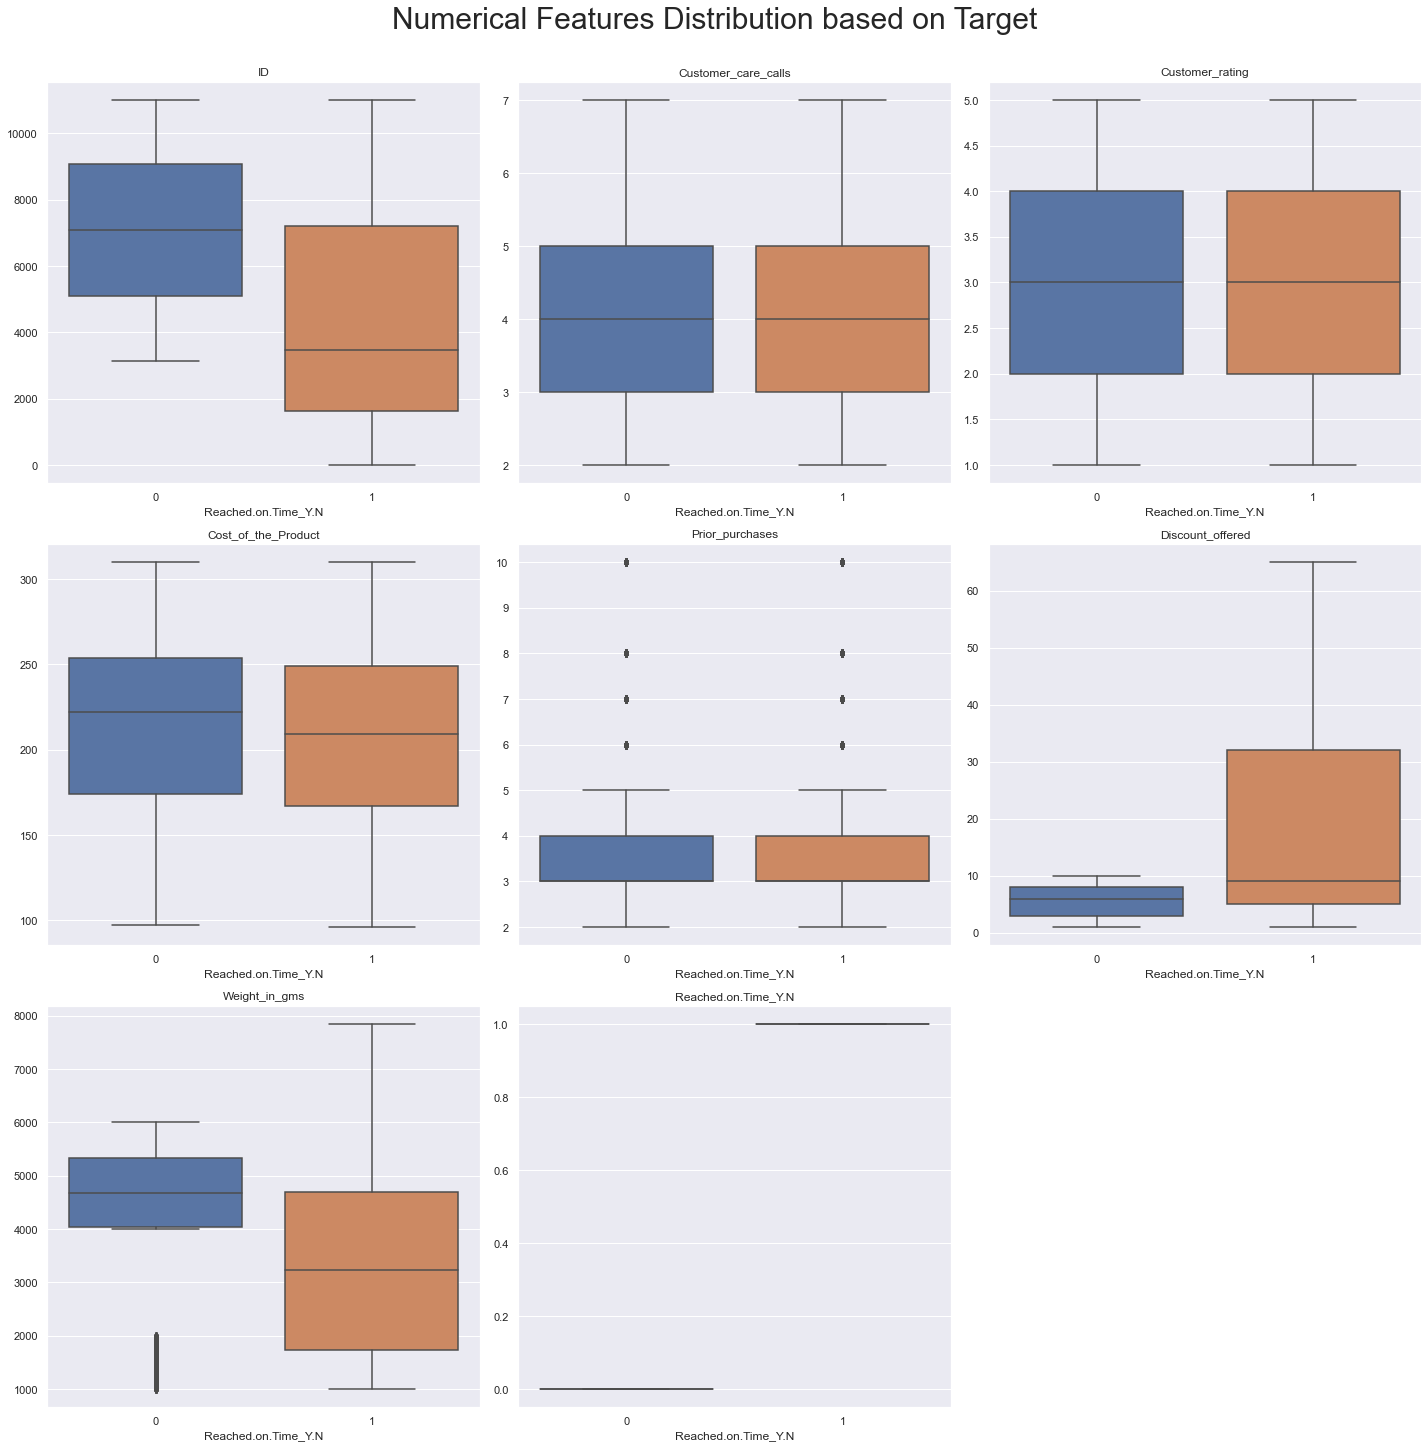

In [31]:
plt.figure(figsize=(20, 20))
plt.suptitle('Numerical Features Distribution based on Target', fontsize = 30, y = 1.005)
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//3+1, 3, i+1)
    ax = sns.boxplot(
        y = df[num_cols[i]],
        x = df['Reached.on.Time_Y.N'],
    )
    ax.set_ylabel('')
    ax.set_title(num_cols[i])
plt.tight_layout()
plt.show()

In [32]:
fig = px.violin(df, y="Discount_offered", x='Reached.on.Time_Y.N', color='Reached.on.Time_Y.N', box=True,
          hover_data=df.columns)
fig.show()

In [33]:
fig = px.violin(df, y="Discount_offered", x='Product_importance', color='Reached.on.Time_Y.N', box=True,
          hover_data=df.columns)
fig.show()

In [34]:
fig = px.box(df, y="Discount_offered", x='Product_importance', color='Mode_of_Shipment')
fig.update_layout(barmode='stack')
fig.show()

# EDA Analysis

> #### Insight
>   - **There is more case of delayed shipment than on-time shipment.**
>   - **The highly correlated give us insight that, the more value of discount, it might be affected the shipment time. Also the higher the cost of the product, the more frequently customer got called for enquiry of the shipment** 
>   - **The frequency of customer being called, it affected the prior purchases and customer rating, but not that significant. The higher the product cost, it affect that quantity of prior purchased by customer**
>   - **The highest value count of delayed shipment dominated by customer rating 3. But it is interesting, because the best rating(rating 5) doesn't have significantly different value count either the shipment delayed or not, But, cases that has the most delayed shipment is the case that customer rating 3**
>   - **There is more case of delayed on Ship, followed by flight, and then Road. It is interesting that the case count between Flight and Road are not significantly different. The majority of shipment is using ship, 67.84% case or 7462 cases of shipment is using ship, but the majority of shipment that using ship, 4459 cases or 59.75 cases are delayed**
>   - **Warehouse block F has the highest count of shipment, consequently by having the highest count, the delayed cases from warehouse F is the highest.The delayed shipment of warehouse block A,B,C,D are not significantly different.**
>   - **The majority of product that had been shipped are low and medium importance product, cover 92% of shipments count, the 8% others are high importance product. Because the highly shipped product are low and medium importance product, the majority of delayed shipment cases are low and medium importance product**
>   - **Product weight from 2000-4000 is always has the delayed shipment**

# Feature Selection with Random Forest

In [35]:
num_cols = df.select_dtypes(include = ['int64', 'float64']).columns.to_list()


cat_cols  = df.select_dtypes(include = ['object']).columns.to_list()

In [36]:
num_cols.remove('ID')

In [37]:
num_cols.remove('Reached.on.Time_Y.N')

In [38]:
num_cols

['Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms']

In [39]:
cat_cols

['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

**Get dummies encoding for categorical columns**

In [40]:
df.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

In [41]:
df['ID']

0            1
1            2
2            3
3            4
4            5
         ...  
10994    10995
10995    10996
10996    10997
10997    10998
10998    10999
Name: ID, Length: 10999, dtype: int64

In [42]:
df.drop('ID',axis=1,inplace=True)

In [43]:
df_dummies = pd.get_dummies(data=df, columns=cat_cols)

In [44]:
df_dummies.head()

Customer_care_calls  Customer_rating  Cost_of_the_Product  Prior_purchases  \
0                    4                2                  177                3   
1                    4                5                  216                2   
2                    2                2                  183                4   
3                    3                3                  176                4   
4                    2                2                  184                3   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  Warehouse_block_A  \
0                44           1233                    1                  0   
1                59           3088                    1                  0   
2                48           3374                    1                  1   
3                10           1177                    1                  0   
4                46           2484                    1                  0   

   Warehouse_block_B  Warehouse_block_C  Warehouse_block_D  Warehouse_block_F  \
0                  0                  0                  1                  0   
1                  0                  0                  0                  1   
2                  0                  0                  0                  0   
3                  1                  0                  0                  0   
4                  0                  1                  0                  0   

   Mode_of_Shipment_Flight  Mode_of_Shipment_Road  Mode_of_Shipment_Ship  \
0                        1                      0                      0   
1                        1                      0                      0   
2                        1                      0                      0   
3                        1                      0                      0   
4                        1                      0                      0   

   Product_importance_high  Product_importance_low  Product_importance_medium  \
0                        0                       1                          0   
1                        0                       1                          0   
2                        0                       1                          0   
3                        0                       0                          1   
4                        0                       0                          1   

   Gender_F  Gender_M  
0         1         0  
1         0         1  
2         0         1  
3         0         1  
4         1         0

**Standard scaler for numerical cols**

In [45]:
scaler = StandardScaler()
df_PCA = scaler.fit_transform(df[num_cols])

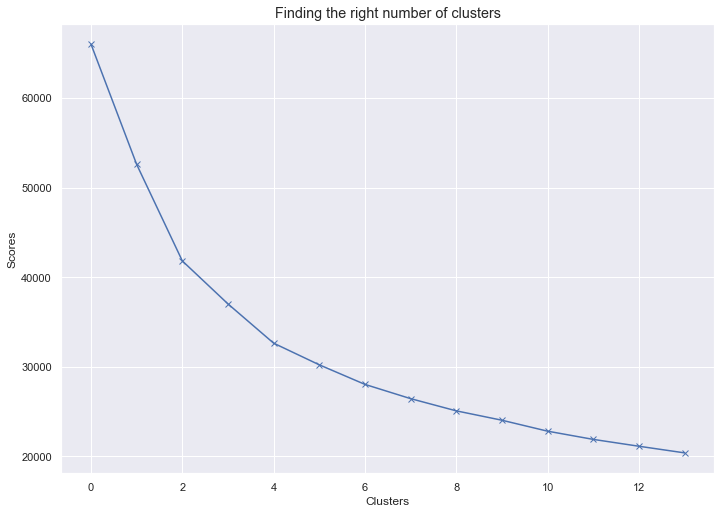

In [46]:
from sklearn.cluster import KMeans

scores_1 = []

range_values = range(1,15)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_PCA)
    scores_1.append(kmeans.inertia_)
plt.plot(scores_1, 'bx-')
plt.style.use('ggplot')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

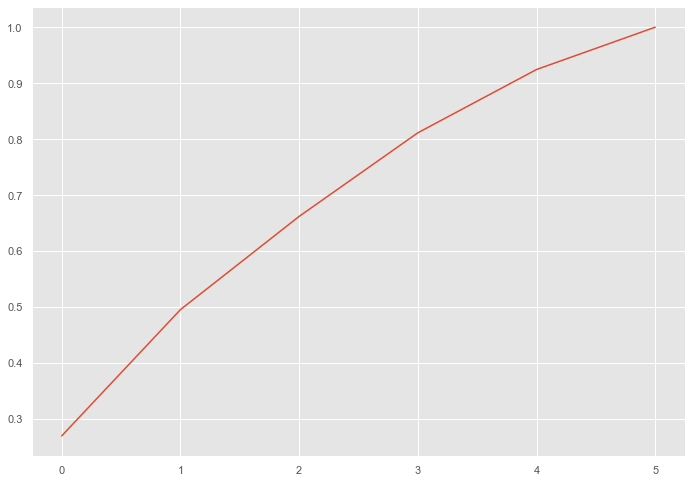

In [47]:
pca=PCA(whiten=True)
pca.fit(df_PCA)
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.figure()
plt.plot(cumsum)

In [48]:
X2D=PCA(n_components=4).fit_transform(df_PCA)
df_PCA_final=pd.DataFrame(data=X2D,columns=["num1","num2", "num3", "num4"])
df_PCA_final.head()

num1      num2      num3      num4
0  0.178392  2.503297 -0.664681 -0.154587
1 -0.170092  2.394074  1.428134 -1.221893
2 -1.169979  2.154668 -0.581917  0.756606
3 -0.058263  0.973401  0.052256  0.736330
4 -1.162134  2.415051 -0.610033  0.172140

In [49]:
np.sum(pca.explained_variance_ratio_)

1.0

In [50]:
df_dummies = df_dummies.drop(num_cols,axis=1)

In [51]:
df_dummies

Reached.on.Time_Y.N  Warehouse_block_A  Warehouse_block_B  \
0                        1                  0                  0   
1                        1                  0                  0   
2                        1                  1                  0   
3                        1                  0                  1   
4                        1                  0                  0   
...                    ...                ...                ...   
10994                    1                  1                  0   
10995                    0                  0                  1   
10996                    0                  0                  0   
10997                    0                  0                  0   
10998                    0                  0                  0   

       Warehouse_block_C  Warehouse_block_D  Warehouse_block_F  \
0                      0                  1                  0   
1                      0                  0                  1   
2                      0                  0                  0   
3                      0                  0                  0   
4                      1                  0                  0   
...                  ...                ...                ...   
10994                  0                  0                  0   
10995                  0                  0                  0   
10996                  1                  0                  0   
10997                  0                  0                  1   
10998                  0                  1                  0   

       Mode_of_Shipment_Flight  Mode_of_Shipment_Road  Mode_of_Shipment_Ship  \
0                            1                      0                      0   
1                            1                      0                      0   
2                            1                      0                      0   
3                            1                      0                      0   
4                            1                      0                      0   
...                        ...                    ...                    ...   
10994                        0                      0                      1   
10995                        0                      0                      1   
10996                        0                      0                      1   
10997                        0                      0                      1   
10998                        0                      0                      1   

       Product_importance_high  Product_importance_low  \
0                            0                       1   
1                            0                       1   
2                            0                       1   
3                            0                       0   
4                            0                       0   
...                        ...                     ...   
10994                        0                       0   
10995                        0                       0   
10996                        0                       1   
10997                        0                       0   
10998                        0                       1   

       Product_importance_medium  Gender_F  Gender_M  
0                              0         1         0  
1                              0         0         1  
2                              0         0         1  
3                              1         0         1  
4                              1         1         0  
...                          ...       ...       ...  
10994                          1         1         0  
10995                          1         1         0  
10996                          0         1         0  
10997                          1         0         1  
10998                          0         1         0  

[10999 rows x 14 columns]

In [52]:
df_final = pd.merge(df_dummies, df_PCA_final, left_index=True, right_index=True)

In [53]:
df_final.head()

Reached.on.Time_Y.N  Warehouse_block_A  Warehouse_block_B  \
0                    1                  0                  0   
1                    1                  0                  0   
2                    1                  1                  0   
3                    1                  0                  1   
4                    1                  0                  0   

   Warehouse_block_C  Warehouse_block_D  Warehouse_block_F  \
0                  0                  1                  0   
1                  0                  0                  1   
2                  0                  0                  0   
3                  0                  0                  0   
4                  1                  0                  0   

   Mode_of_Shipment_Flight  Mode_of_Shipment_Road  Mode_of_Shipment_Ship  \
0                        1                      0                      0   
1                        1                      0                      0   
2                        1                      0                      0   
3                        1                      0                      0   
4                        1                      0                      0   

   Product_importance_high  Product_importance_low  Product_importance_medium  \
0                        0                       1                          0   
1                        0                       1                          0   
2                        0                       1                          0   
3                        0                       0                          1   
4                        0                       0                          1   

   Gender_F  Gender_M      num1      num2      num3      num4  
0         1         0  0.178392  2.503297 -0.664681 -0.154587  
1         0         1 -0.170092  2.394074  1.428134 -1.221893  
2         0         1 -1.169979  2.154668 -0.581917  0.756606  
3         0         1 -0.058263  0.973401  0.052256  0.736330  
4         1         0 -1.162134  2.415051 -0.610033  0.172140

In [54]:
df_final['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N']
df_final.head()

Reached.on.Time_Y.N  Warehouse_block_A  Warehouse_block_B  \
0                    1                  0                  0   
1                    1                  0                  0   
2                    1                  1                  0   
3                    1                  0                  1   
4                    1                  0                  0   

   Warehouse_block_C  Warehouse_block_D  Warehouse_block_F  \
0                  0                  1                  0   
1                  0                  0                  1   
2                  0                  0                  0   
3                  0                  0                  0   
4                  1                  0                  0   

   Mode_of_Shipment_Flight  Mode_of_Shipment_Road  Mode_of_Shipment_Ship  \
0                        1                      0                      0   
1                        1                      0                      0   
2                        1                      0                      0   
3                        1                      0                      0   
4                        1                      0                      0   

   Product_importance_high  Product_importance_low  Product_importance_medium  \
0                        0                       1                          0   
1                        0                       1                          0   
2                        0                       1                          0   
3                        0                       0                          1   
4                        0                       0                          1   

   Gender_F  Gender_M      num1      num2      num3      num4  
0         1         0  0.178392  2.503297 -0.664681 -0.154587  
1         0         1 -0.170092  2.394074  1.428134 -1.221893  
2         0         1 -1.169979  2.154668 -0.581917  0.756606  
3         0         1 -0.058263  0.973401  0.052256  0.736330  
4         1         0 -1.162134  2.415051 -0.610033  0.172140

In [55]:
scaler=StandardScaler()
scaler.fit(df_final)

StandardScaler()

In [56]:
X_rnd=df_final.drop(['Reached.on.Time_Y.N'], axis=1)
y_rnd=df_final['Reached.on.Time_Y.N']

In [57]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X_rnd,y_rnd,test_size=0.3,random_state=23)

In [58]:
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train1, y_train1)

SelectFromModel(estimator=RandomForestClassifier())

In [59]:
selected_feat= X_train1.columns[(sel.get_support())]
len(selected_feat)
print('Feature selected:', (selected_feat.tolist()))

Feature selected: ['num1', 'num2', 'num3', 'num4']


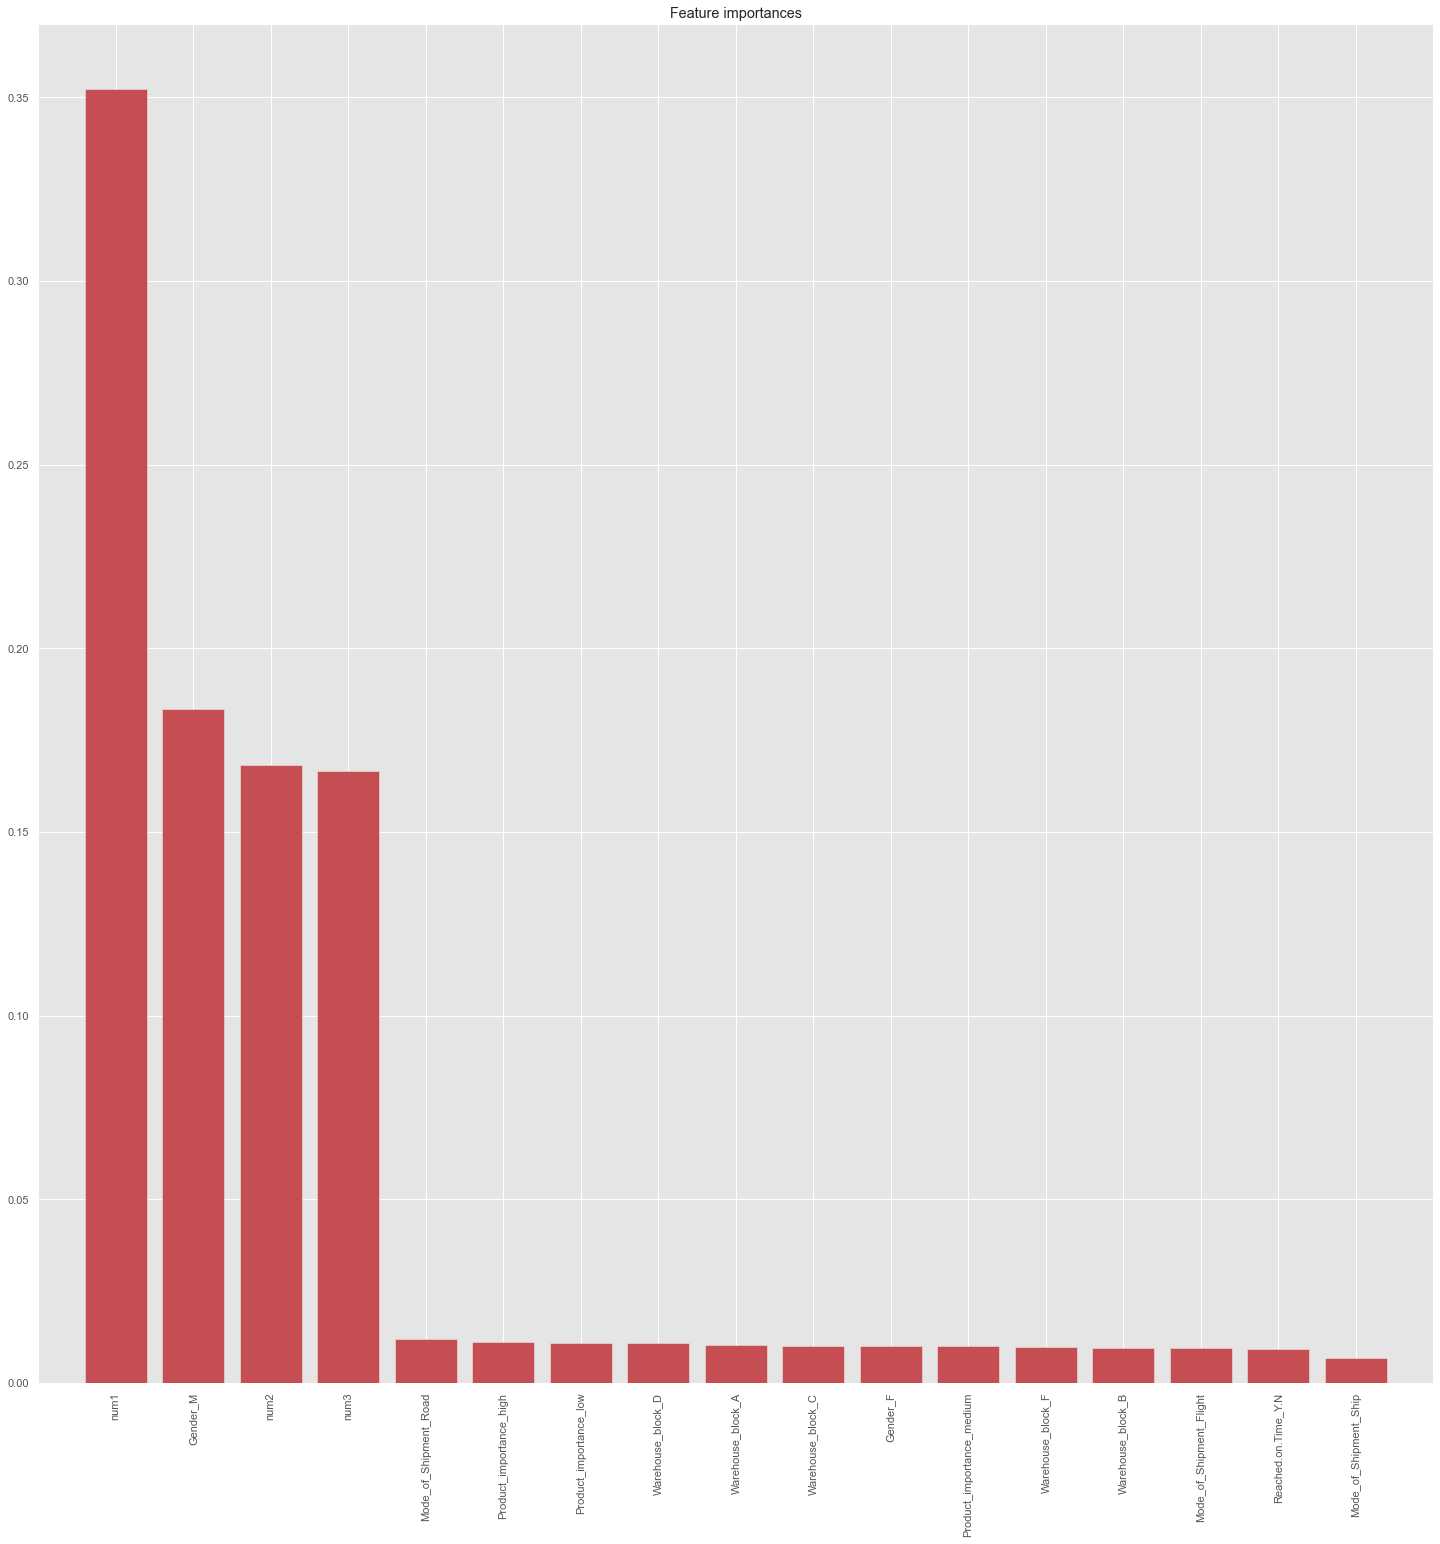

In [60]:
importances = sel.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
# X is the train data used to fit the model 
plt.figure(figsize = (25, 25))
plt.title("Feature importances")
plt.bar(range(X_train1.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train1.shape[1]), df_final.columns[indices], rotation=90)
plt.xlim([-1, X_train1.shape[1]])
plt.show()

# Model Preparation and Training

**Splitting data into train, validation, and testing**

In [61]:
df_new = df
df_new.head()

Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0               D           Flight                    4                2   
1               F           Flight                    4                5   
2               A           Flight                    2                2   
3               B           Flight                    3                3   
4               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

In [62]:
num_cols = df.select_dtypes(include = ['int64', 'float64'])


cat_cols  = df.select_dtypes(include = ['object'])

In [63]:
num_cols.drop(columns='Reached.on.Time_Y.N',inplace=True)
num_cols

/Users/zaintama/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Customer_care_calls  Customer_rating  Cost_of_the_Product  \
0                        4                2                  177   
1                        4                5                  216   
2                        2                2                  183   
3                        3                3                  176   
4                        2                2                  184   
...                    ...              ...                  ...   
10994                    4                1                  252   
10995                    4                1                  232   
10996                    5                4                  242   
10997                    5                2                  223   
10998                    2                5                  155   

       Prior_purchases  Discount_offered  Weight_in_gms  
0                    3                44           1233  
1                    2                59           3088  
2                    4                48           3374  
3                    4                10           1177  
4                    3                46           2484  
...                ...               ...            ...  
10994                5                 1           1538  
10995                5                 6           1247  
10996                5                 4           1155  
10997                6                 2           1210  
10998                5                 6           1639  

[10999 rows x 6 columns]

In [64]:
categorical_cols =['Warehouse_block','Mode_of_Shipment','Product_importance','Gender','Customer_rating']
numerical_cols = ['Cost_of_the_Product','Discount_offered','Weight_in_gms','Customer_care_calls','Prior_purchases']

In [65]:
X= df_new.drop('Reached.on.Time_Y.N',axis=1)
y = df_new['Reached.on.Time_Y.N']

In [66]:
X_train,X_rem,y_train,y_rem = train_test_split(X,y,train_size=0.7, random_state=23)

In [67]:
X_val,X_test,y_val,y_test = train_test_split(X_rem, y_rem, test_size=0.2, random_state=23)
print(X_train.shape), print(y_train.shape)
print(X_val.shape), print(y_val.shape)
print(X_test.shape), print(y_test.shape)

(7699, 10)
(7699,)
(2640, 10)
(2640,)
(660, 10)
(660,)


(None, None)

In [68]:
numerical_transformer = StandardScaler()

In [69]:
categorical_transformer = LabelEncoder()

In [70]:
column_trans = make_column_transformer(
    (OneHotEncoder(),categorical_cols),
    (StandardScaler(),numerical_cols),
    remainder='passthrough')

**Make pipeline**

In [71]:
#pipe_nb = Pipeline([('pre', column_trans),
#			('clf', GaussianNB(random_state=23))])

#pipe_gboost = Pipeline[('pre', column_trans),
#            ('clf', GradientBoostingClassifier(random_state=23))]

Performing model optimizations...
CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 15 µs

Estimator: Logistic Regression
Best params: {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best training accuracy: 0.640
Validation set accuracy score for best params: 0.640 
              precision    recall  f1-score   support

           0       0.55      0.58      0.57      1065
           1       0.71      0.68      0.69      1575

    accuracy                           0.64      2640
   macro avg       0.63      0.63      0.63      2640
weighted avg       0.64      0.64      0.64      2640

[[ 620  445]
 [ 505 1070]]


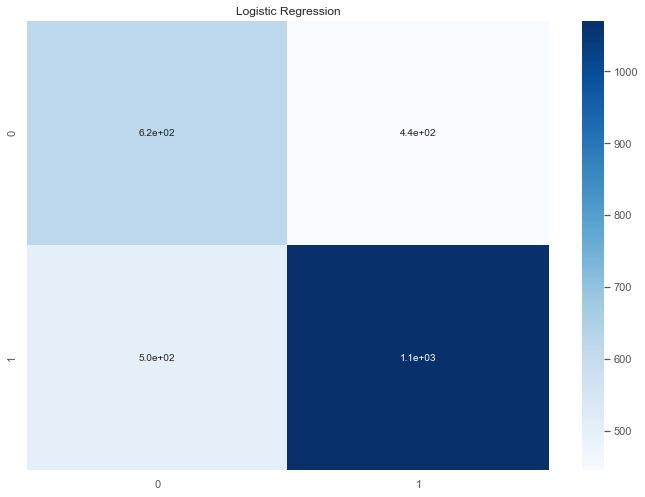

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs

Estimator: Logistic Regression PCA
Best params: {'clf__C': 0.5, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best training accuracy: 0.642
Validation set accuracy score for best params: 0.661 
              precision    recall  f1-score   support

           0       0.58      0.58      0.58      1065
           1       0.71      0.72      0.72      1575

    accuracy                           0.66      2640
   macro avg       0.65      0.65      0.65      2640
weighted avg       0.66      0.66      0.66      2640

[[ 614  451]
 [ 444 1131]]


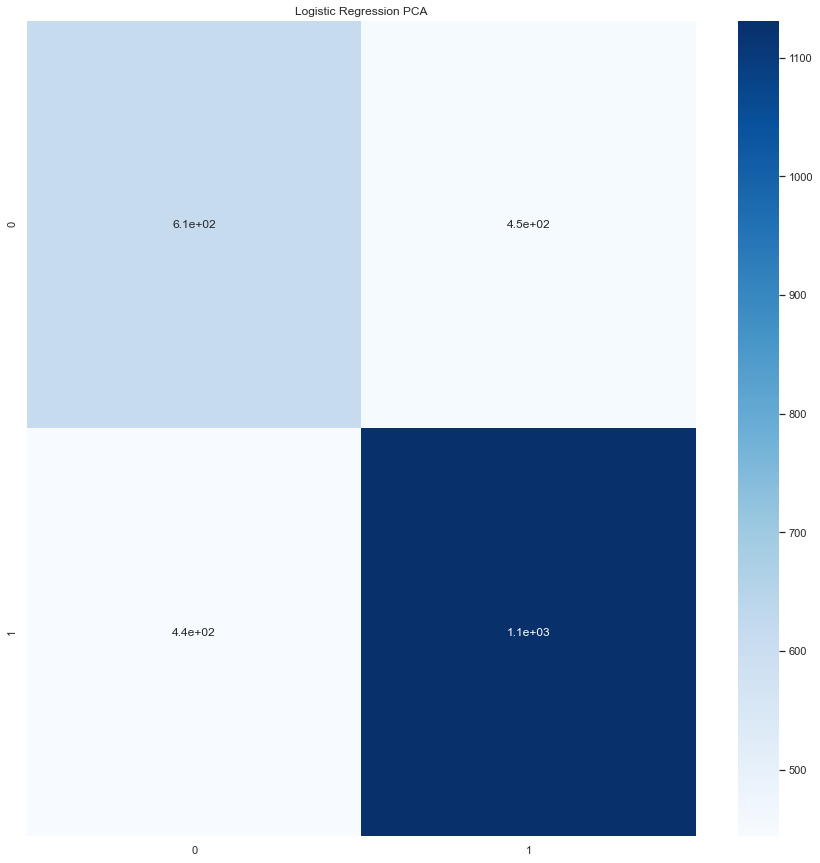

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs

Estimator: Random Forest
Best params: {'clf__criterion': 'gini', 'clf__max_depth': 7, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 3, 'clf__n_estimators': 100}
Best training accuracy: 0.678
Validation set accuracy score for best params: 0.669 
              precision    recall  f1-score   support

           0       0.56      0.82      0.67      1065
           1       0.82      0.57      0.67      1575

    accuracy                           0.67      2640
   macro avg       0.69      0.69      0.67      2640
weighted avg       0.72      0.67      0.67      2640

[[871 194]
 [680 895]]


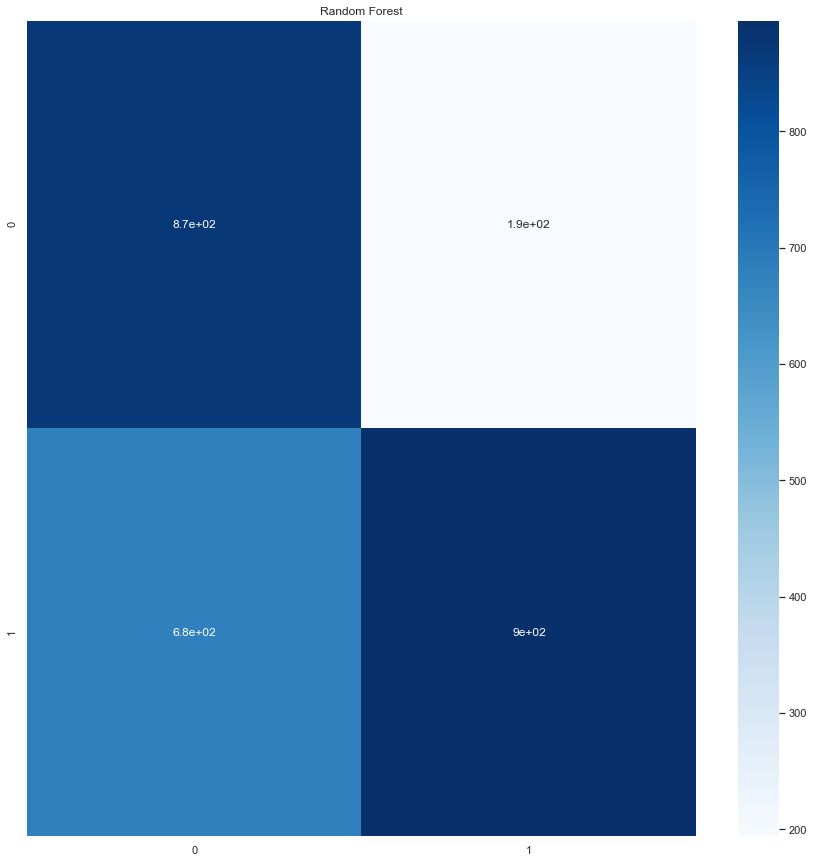

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 7.15 µs

Estimator: Random Forest PCA
Best params: {'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 9, 'clf__n_estimators': 100}
Best training accuracy: 0.671
Validation set accuracy score for best params: 0.657 
              precision    recall  f1-score   support

           0       0.55      0.77      0.65      1065
           1       0.79      0.58      0.67      1575

    accuracy                           0.66      2640
   macro avg       0.67      0.68      0.66      2640
weighted avg       0.69      0.66      0.66      2640

[[823 242]
 [663 912]]


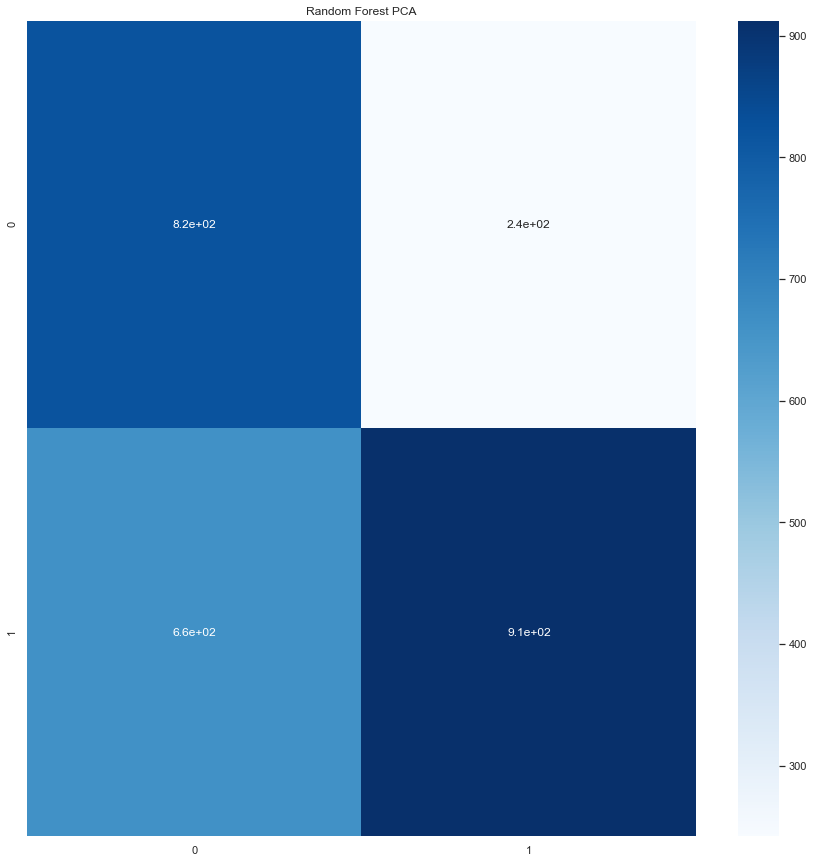

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 14.1 µs

Estimator: GaussianNB
Best params: {'clf__var_smoothing': 0.001}
Best training accuracy: 0.649
Validation set accuracy score for best params: 0.653 
              precision    recall  f1-score   support

           0       0.54      0.98      0.70      1065
           1       0.97      0.43      0.60      1575

    accuracy                           0.65      2640
   macro avg       0.76      0.71      0.65      2640
weighted avg       0.80      0.65      0.64      2640

[[1045   20]
 [ 895  680]]


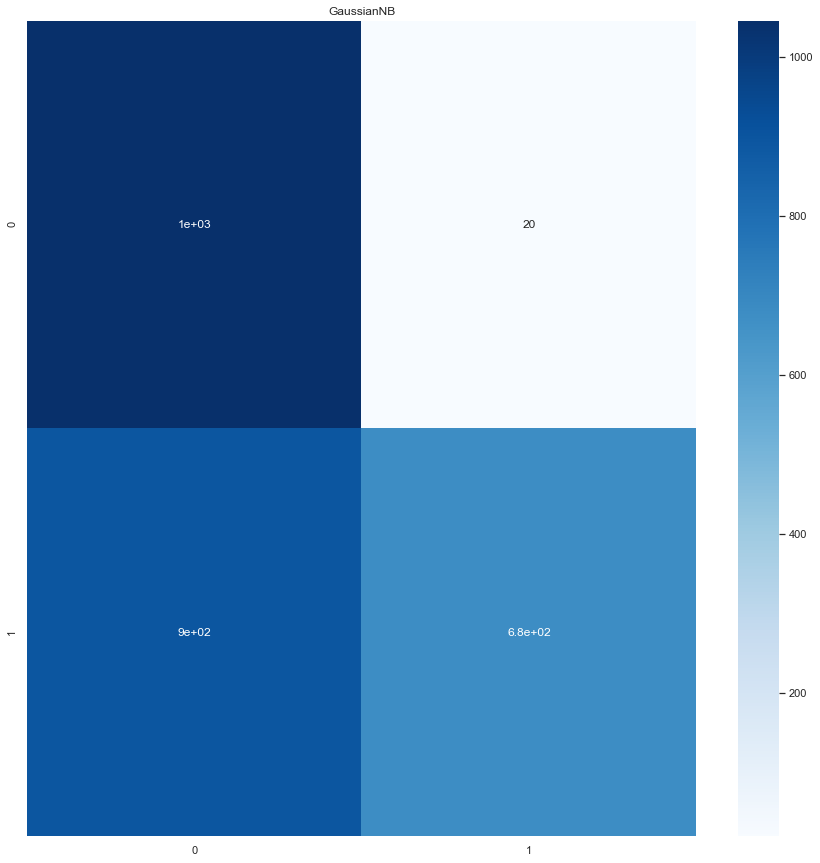

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs

Estimator: Gradient Boosting Classifier
Best params: {'clf__learning_rate': 0.2, 'clf__loss': 'deviance'}
Best training accuracy: 0.673
Validation set accuracy score for best params: 0.672 
              precision    recall  f1-score   support

           0       0.57      0.80      0.66      1065
           1       0.81      0.59      0.68      1575

    accuracy                           0.67      2640
   macro avg       0.69      0.69      0.67      2640
weighted avg       0.71      0.67      0.67      2640

[[848 217]
 [650 925]]


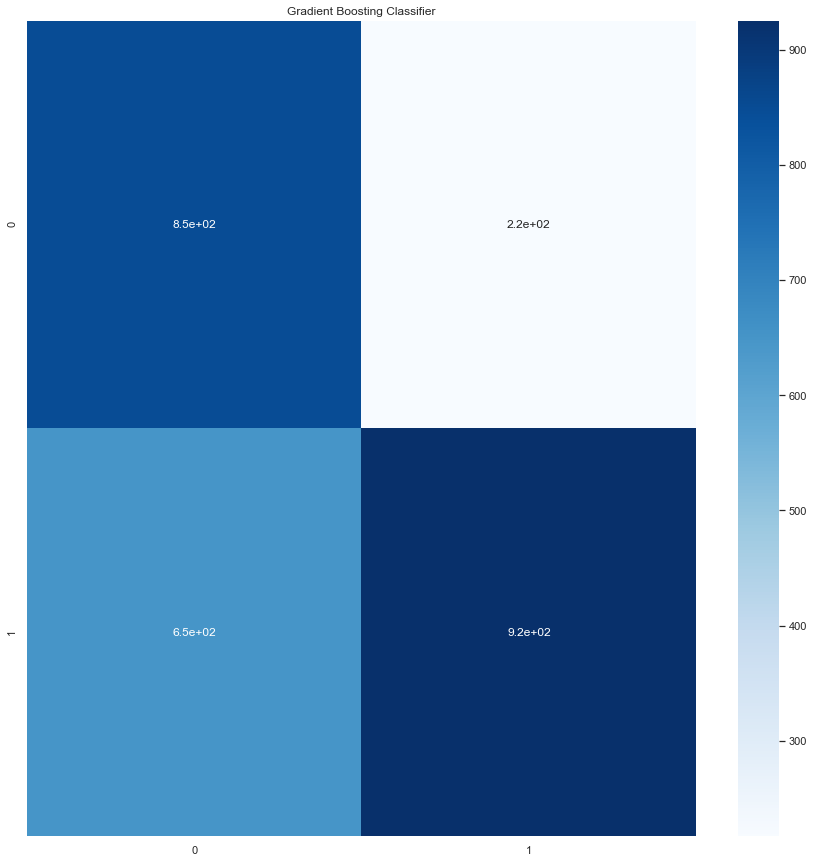


Classifier with best test set accuracy: Gradient Boosting Classifier

Saved Gradient Boosting Classifier grid search pipeline to file: best_gs_pipeline.pkl


In [72]:
# Construct some pipelines
pipe_lr = Pipeline([('pre', column_trans),
			('clf', LogisticRegression(random_state=42))])

pipe_lr_pca = Pipeline([('pre', column_trans),
			('pca', PCA(n_components=4)),
			('clf', LogisticRegression(random_state=42))])

pipe_rf = Pipeline([('pre', column_trans),
			('clf', RandomForestClassifier(random_state=42))])

pipe_rf_pca = Pipeline([('pre', column_trans),
			('pca', PCA(n_components=4)),
			('clf', RandomForestClassifier(random_state=42))])

pipe_nb = Pipeline([('pre', column_trans),
			('clf', GaussianNB())])

pipe_gboost = Pipeline([('pre', column_trans),
			('clf', GradientBoostingClassifier(random_state=23))])

#pipe_svm = Pipeline([('pre', column_trans),
#			('clf', SVC(random_state=42))])

#pipe_svm_pca = Pipeline([('pre', column_trans),
#			('pca', PCA(n_components=2)),
#			('clf', SVC(random_state=42))])
			
# Set grid search params
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_fl = [1.0, 0.5, 0.1]


grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
		'clf__C': param_range_fl,
		'clf__solver': ['liblinear']}] 

grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
		'clf__min_samples_leaf': param_range,
		'clf__max_depth': param_range,
		'clf__min_samples_split': param_range[1:],
		'clf__n_estimators':[10,100]}]

grid_params_nb = [{'clf__var_smoothing':[0.01,0.001]}]

grid_params_gboost = [{
    'clf__loss':['exponential','deviance'],
    'clf__learning_rate':[0.2,0.3]
}]

#grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
#		'clf__C': param_range}]

# Construct grid searches
jobs = -1

gs_lr = GridSearchCV(estimator=pipe_lr,
			param_grid=grid_params_lr,
			scoring='accuracy',
			cv=5) 
			
gs_lr_pca = GridSearchCV(estimator=pipe_lr_pca,
			param_grid=grid_params_lr,
			scoring='accuracy',
			cv=5)
			
gs_rf = GridSearchCV(estimator=pipe_rf,
			param_grid=grid_params_rf,
			scoring='accuracy',
			cv=5, 
			n_jobs=jobs)

gs_rf_pca = GridSearchCV(estimator=pipe_rf_pca,
			param_grid=grid_params_rf,
			scoring='accuracy',
			cv=5, 
			n_jobs=jobs)

gs_nb = GridSearchCV(estimator=pipe_nb,
			param_grid=grid_params_nb,
			scoring='accuracy',
			cv=5, 
			n_jobs=jobs)

gs_gboost = GridSearchCV(estimator=pipe_gboost,
			param_grid=grid_params_gboost,
			scoring='accuracy',
			cv=5, 
			n_jobs=jobs)

#gs_svm = GridSearchCV(estimator=pipe_svm,
#			param_grid=grid_params_svm,
#			scoring='accuracy',
#			cv=10,
#			n_jobs=jobs)

#gs_svm_pca = GridSearchCV(estimator=pipe_svm_pca,
#			param_grid=grid_params_svm,
#			scoring='accuracy',
#			cv=10,
#			n_jobs=jobs)

# List of pipelines for ease of iteration
grids = [gs_lr, gs_lr_pca, gs_rf, gs_rf_pca, gs_nb, gs_gboost]

# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Logistic Regression', 1: 'Logistic Regression PCA', 
		2: 'Random Forest', 3: 'Random Forest PCA', 
		4: 'GaussianNB', 5: 'Gradient Boosting Classifier'}

# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
	%time
	print('\nEstimator: %s' % grid_dict[idx])	
	# Fit grid search	
	gs.fit(X_train, y_train)
	# Best params
	print('Best params: %s' % gs.best_params_)
	# Best training data accuracy
	print('Best training accuracy: %.3f' % gs.best_score_)
	# Predict on test data with best params
	y_pred = gs.predict(X_val)
	# Test data accuracy of model with best params
	print('Validation set accuracy score for best params: %.3f ' % accuracy_score(y_val, y_pred))
	print(classification_report(y_val,y_pred))
	print(confusion_matrix(y_val,y_pred))
	sns.heatmap(confusion_matrix(y_val,y_pred),cmap='Blues',annot=True)
	sns.set(rc={'figure.figsize':(15,15)})
	plt.savefig('Confussion matrix %s' % grid_dict[idx])
	plt.title('%s' % grid_dict[idx])
	plt.show()
	# Track best (highest test accuracy) model
	if accuracy_score(y_val, y_pred) > best_acc:
		best_acc = accuracy_score(y_val, y_pred)
		best_gs = gs
		best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])
#fpr = dict()
#tpr = dict()
#roc_auc = dict()
#for i in range(n_classes):
#    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
#    roc_auc[i] = auc(fpr[i], tpr[i])

# Save best grid search pipeline to file
dump_file = 'best_gs_pipeline.pkl'
joblib.dump(best_gs, dump_file, compress=1)
print('\nSaved %s grid search pipeline to file: %s' % (grid_dict[best_clf], dump_file))

In [73]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    

    plt.grid(True) 

Text(0.5, 1.0, 'ROC and AUC')

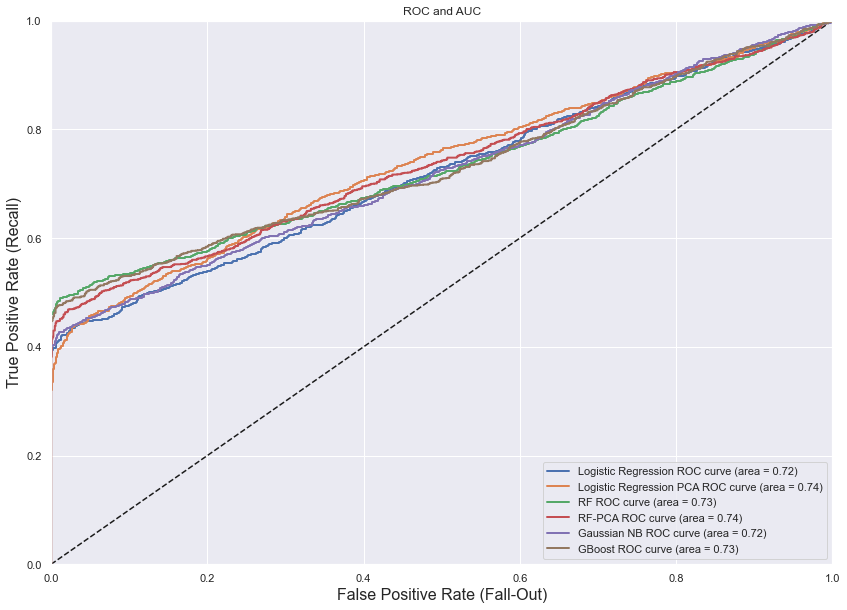

In [74]:
plt.figure(figsize=(14, 10))                                    
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
plt.grid(True)                                            
plt.plot([0, 1], [0, 1], 'k--') 
labels=['Logistic Regression','Logistic Regression PCA', 'RF', 'RF-PCA','Gaussian NB','GBoost']
for idx,model in enumerate([gs_lr, gs_lr_pca, gs_rf, gs_rf_pca, gs_nb, gs_gboost]):
    y_scores = model.predict_proba(X_val)[:,1]
    fpr, tpr, thresholds = roc_curve(y_val, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2,label=labels[idx] + ' ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.title('ROC and AUC')

In [75]:
best_pipe_rf = Pipeline([('pre', column_trans),
			('clf', RandomForestClassifier(criterion='entropy', max_depth= 8, min_samples_leaf= 1, min_samples_split= 10))])

# Model Analysis

*Overall model have a average accuracy more than 60%*

**Classifier with best test set accuracy is random forest with hyperparameter clf__criterion': 'entropy', 'clf__max_depth': 8, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 10**

- F1 score 0.67
- Training accuracy: 0.678 
- Validation set accuracy score for best params: 0.669 
- AUC : 0.73

# Model Inference

In [76]:
best_pipe_rf = Pipeline([('pre', column_trans),
			('clf', RandomForestClassifier(criterion='entropy', max_depth= 8, min_samples_leaf= 1, min_samples_split= 10))])

In [77]:
best_pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Warehouse_block',
                                                   'Mode_of_Shipment',
                                                   'Product_importance',
                                                   'Gender',
                                                   'Customer_rating']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Cost_of_the_Product',
                                                   'Discount_offered',
                                                   'Weight_in_gms',
                                                   'Customer_care_calls',
            

In [78]:
best_pipe_rf.predict(X_test)

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [79]:
best_pipe_rf.score(X_test,y_test)

0.6787878787878788

In [80]:
X_test[:1]

Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
5326               C             Road                    6                1   

      Cost_of_the_Product  Prior_purchases Product_importance Gender  \
5326                  250                3                low      M   

      Discount_offered  Weight_in_gms  
5326                 5           5621

In [81]:
X_test.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms'],
      dtype='object')

In [82]:
X_inf = pd.DataFrame({
    'Warehouse_block':['A','B','C','F'],
    'Mode_of_Shipment':['Ship','Road','Road','Flight'],
    'Customer_care_calls':[1,3,4,6],
    'Customer_rating':[1,3,3,5],
    'Cost_of_the_Product':[1000,1500,2000,100],
    'Prior_purchases':[10,1,3,5],
    'Product_importance':['low','low','medium','high'],
    'Gender':['M','F','F','M'],
    'Discount_offered':[100,10,200,300],
    'Weight_in_gms':[123,345,456,567]
})
X_inf

Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0               A             Ship                    1                1   
1               B             Road                    3                3   
2               C             Road                    4                3   
3               F           Flight                    6                5   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                 1000               10                low      M   
1                 1500                1                low      F   
2                 2000                3             medium      F   
3                  100                5               high      M   

   Discount_offered  Weight_in_gms  
0               100            123  
1                10            345  
2               200            456  
3               300            567

In [83]:
best_pipe_rf.predict(X_inf)

array([1, 1, 1, 1])

In [84]:
best_pipe_rf.steps[1][1]

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=10)

In [85]:
best_pipe_rf.steps[1][1].feature_importances_

array([0.00335441, 0.00338299, 0.00323835, 0.00407082, 0.00383524,
       0.00418217, 0.00355853, 0.00393787, 0.00430971, 0.00374442,
       0.00372031, 0.00348693, 0.00313954, 0.00288135, 0.00525037,
       0.00316782, 0.00412779, 0.00384301, 0.06311404, 0.47445294,
       0.31475843, 0.02724382, 0.05319914])

In [86]:
best_pipe_rf.steps[0][1].transformers_

[('onehotencoder',
  OneHotEncoder(),
  ['Warehouse_block',
   'Mode_of_Shipment',
   'Product_importance',
   'Gender',
   'Customer_rating']),
 ('standardscaler',
  StandardScaler(),
  ['Cost_of_the_Product',
   'Discount_offered',
   'Weight_in_gms',
   'Customer_care_calls',
   'Prior_purchases'])]

IndexError: index 13 is out of bounds for axis 0 with size 10

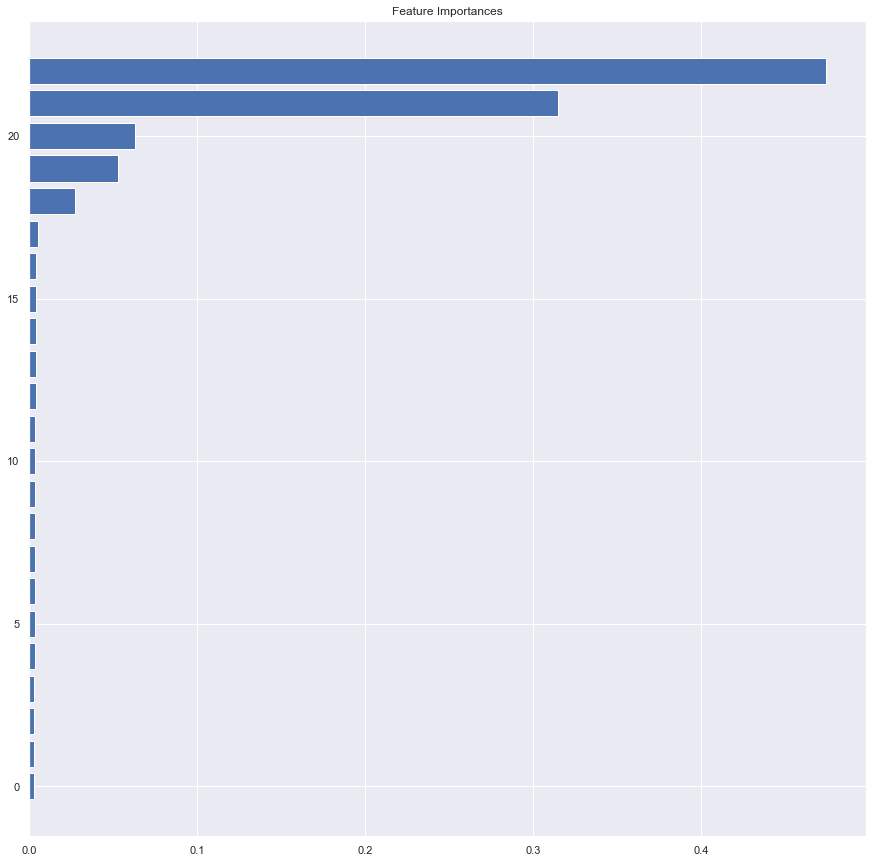

In [87]:
features=X_train.columns
importances = best_pipe_rf.steps[1][1].feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')